In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
books=pd.read_csv('Books/Books.csv')
users=pd.read_csv('Users/Users.csv')
ratings=pd.read_csv('Ratings/Ratings.csv')

C:\Users\admin\AppData\Local\Temp\ipykernel_32932\3453391937.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books/Books.csv')


In [48]:
# checking shape
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


Checking null values

In [49]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [50]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [51]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Checking duplicate values

In [52]:
books.duplicated().sum()

0

In [53]:
users.duplicated().sum()

0

In [54]:
ratings.duplicated().sum()

0

In [109]:
# Merge user and rating files on basis of user id
merged_data=pd.merge(ratings,users,on='User-ID')

In [110]:
merged_data['Location']=merged_data['Location'].apply(lambda x:x.split(',')[-1])

In [111]:
merged_data['Location']=merged_data['Location'].str.title()

In [112]:
merged_data.isnull().sum()

User-ID             0
ISBN                0
Book-Rating         0
Location            0
Age            309492
dtype: int64

In [113]:
# Average Book rating on the basis of location
location_rating=merged_data.groupby('Location')['Book-Rating'].mean()

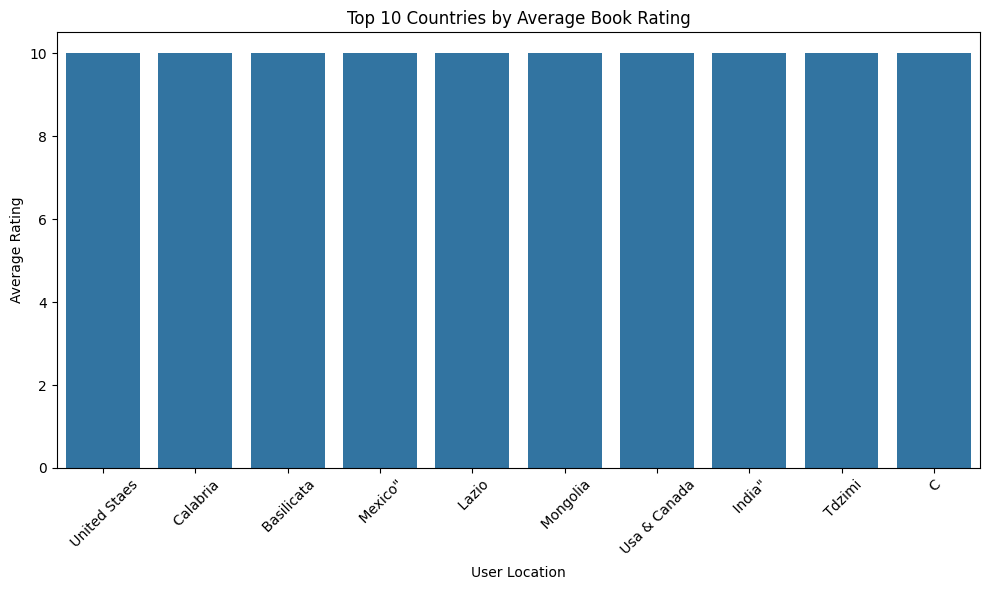

In [114]:

# Sort by 'Book-Rating' and select the top 10 countries
top_countries = pd.DataFrame(location_rating).sort_values(by='Book-Rating', ascending=False).head(10)

# Data visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Book-Rating', data=top_countries)
plt.title('Top 10 Countries by Average Book Rating')
plt.xlabel('User Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [115]:
top_countries

,Book-Rating
Location,
United Staes,10.0
Calabria,10.0
Basilicata,10.0
"Mexico""",10.0
Lazio,10.0
Mongolia,10.0
Usa & Canada,10.0
"India""",10.0
Tdzimi,10.0


In [116]:

result = merged_data[merged_data['Location'] == 'Australia']

print(result)

Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating, Location, Age]
Index: []


In [117]:
merged_data['Location']

0                 Usa
1                 Usa
2           Australia
3             Croatia
4             Croatia
              ...    
1149775           Usa
1149776        Canada
1149777           Usa
1149778           Usa
1149779           Usa
Name: Location, Length: 1149780, dtype: object

In [118]:
merged_data

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,Usa,NaN
1,276726,0155061224,5,Usa,NaN
2,276727,0446520802,0,Australia,16.0
3,276729,052165615X,3,Croatia,16.0
4,276729,0521795028,6,Croatia,16.0
...,...,...,...,...,...
1149775,276704,1563526298,9,Usa,NaN
1149776,276706,0679447156,0,Canada,18.0
1149777,276709,0515107662,10,Usa,38.0
1149778,276721,0590442449,10,Usa,14.0


In [119]:
merged_data['Location'] = merged_data['Location'].str.strip()

In [120]:
merged_data['Location']

0                Usa
1                Usa
2          Australia
3            Croatia
4            Croatia
             ...    
1149775          Usa
1149776       Canada
1149777          Usa
1149778          Usa
1149779          Usa
Name: Location, Length: 1149780, dtype: object

In [121]:
print(merged_data['Location'].unique())

['Usa' 'Australia' 'Croatia' 'France' 'Austria' 'Germany' ''
 'Saudi Arabia' 'Switzerland' 'Canada' 'Spain' 'Netherlands'
 'United Kingdom' 'New Zealand' 'Portugal' 'Italy' 'Luxembourg' 'Brazil'
 'Malaysia' 'Finland' 'Guernsey' 'Costa Rica' 'Ireland' 'Norway' 'Belgium'
 'Denmark' 'Sweden' 'Italy"' 'Sudan' 'Indonesia' 'China' 'Argentina'
 'Japan' 'Hernando' 'Mexico' 'Cyprus' 'India' 'Philippines' 'Greece'
 'Quit' 'Romania' 'Pakistan' 'Chile' 'Basque Country' 'Ethiopia'
 'Singapore' 'Taiwan' 'South Africa' 'Poland' 'Calabria' 'Alderney'
 'Spain"' 'Latvia' 'Denmark"' '"' 'Portugal"' 'Scotland' 'N/A' 'Iran'
 'Slovenia' 'Csa' 'Kazakhstan' 'Turkey"' 'Hong Kong' 'Israel' 'Turkey'
 'España' 'Malta' 'Space' 'South Korea' 'Rwanda' 'Guatemala' 'Colombia'
 'Trinidad And Tobago' 'Slovakia' 'Thailand' 'Bolivia' 'Czech Republic'
 'Argentina"' 'Germany"' 'Monaco' 'Samoa' 'Euskal Herria' 'Bermuda'
 'England' 'Jersey' 'Netherlands"' 'New Zealand"' 'Switzerland"' 'Ghana'
 'U.S. Virgin Islands' 'Qatar' 'B

In [134]:
country_corrections = {
    "Usa": "United States",
    "U.S.A.": "United States",
    "United States Of America": "United States",
    "U.S>":"United States",
    "Australia": "Australia",
    "Autralia": "Australia",  # Correcting typo
    "Germany": "Germany",
    "Geermany": "Germany",  # Correcting typo
    "Cana": "Canada",
    "U.S.A>":"United States",
    "Us":"United States",
    "Cananda": "Canada",

}


In [135]:
import pandas as pd

def clean_country_name(name):
    # Remove unwanted characters and strip whitespace
    name = name.strip().replace('"', '').replace("'", "").replace("\\N/A\\", "").replace("&", "and")
    
    # Make the name consistent in case
    name = name.title()  # Capitalizes first letter of each word
    
    # Use mapping dictionary for corrections
    return country_corrections.get(name, name)  # Return corrected name or original if not found

# Assuming your DataFrame is named merged_data and the location column is 'Location'
merged_data['Location'] = merged_data['Location'].apply(clean_country_name)


In [136]:
print(merged_data['Location'].unique())

['United States' 'Australia' 'Croatia' 'France' 'Austria' 'Germany' ''
 'Saudi Arabia' 'Switzerland' 'Canada' 'Spain' 'Netherlands'
 'United Kingdom' 'New Zealand' 'Portugal' 'Italy' 'Luxembourg' 'Brazil'
 'Malaysia' 'Finland' 'Guernsey' 'Costa Rica' 'Ireland' 'Norway' 'Belgium'
 'Denmark' 'Sweden' 'Sudan' 'Indonesia' 'China' 'Argentina' 'Japan'
 'Hernando' 'Mexico' 'Cyprus' 'India' 'Philippines' 'Greece' 'Quit'
 'Romania' 'Pakistan' 'Chile' 'Basque Country' 'Ethiopia' 'Singapore'
 'Taiwan' 'South Africa' 'Poland' 'Calabria' 'Alderney' 'Latvia'
 'Scotland' 'N/A' 'Iran' 'Slovenia' 'Csa' 'Kazakhstan' 'Turkey'
 'Hong Kong' 'Israel' 'España' 'Malta' 'Space' 'South Korea' 'Rwanda'
 'Guatemala' 'Colombia' 'Trinidad And Tobago' 'Slovakia' 'Thailand'
 'Bolivia' 'Czech Republic' 'Monaco' 'Samoa' 'Euskal Herria' 'Bermuda'
 'England' 'Jersey' 'Ghana' 'U.S. Virgin Islands' 'Qatar' 'Bangladesh'
 'U.S. Of A.' 'Syria' 'Catalunya' 'Albania' 'Moldova' 'Brunei' 'Nigeria'
 'Tanzania' 'Deutschland' 'Yugos

# Popularity Based Recommender System

In [55]:
# Combines Books and ratings on ISBN columns 
rating_withName=ratings.merge(books,on='ISBN')

In [56]:
# Counts the number of rating received by each book
num_rating=rating_withName.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [57]:
# Calculating average rating
avg_rating=rating_withName.groupby('Book-Title')['Book-Rating'].mean().round(1).reset_index()
avg_rating.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.2
1,Always Have Popsicles,0.0
2,Apple Magic (The Collector's series),0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.0
4,Beyond IBM: Leadership Marketing and Finance ...,0.0
...,...,...
241066,Ã?Â?lpiraten.,0.0
241067,Ã?Â?rger mit Produkt X. Roman.,5.2
241068,Ã?Â?sterlich leben.,7.0
241069,Ã?Â?stlich der Berge.,2.7


In [58]:
# Merging number of rating and avergage rating on the basis of datafram
popular_df=num_rating.merge(avg_rating,on='Book-Title')

In [59]:
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.2
1,Always Have Popsicles,1,0.0
2,Apple Magic (The Collector's series),1,0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.0
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.0
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.0
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.2
241068,Ã?Â?sterlich leben.,1,7.0
241069,Ã?Â?stlich der Berge.,3,2.7


In [60]:
# Top 50 popular books where number of rating is greater that 250 
popular_df=popular_df[popular_df['num_ratings']>250].sort_values('avg_ratings',ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.9
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.8
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.7
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.5
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.2
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.0
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.9
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.9
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.9
219741,To Kill a Mockingbird,510,4.7


In [61]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Image-URL-S','num_ratings','avg_ratings']]
popular_df

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-S,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.9
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.8
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.7
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.5
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...,556,5.2
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339681.0...,281,5.0
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339703.0...,368,4.9
26,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339711.0...,260,4.9
37,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...,575,4.9
39,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,510,4.7


# Collborative Filtering Based Book recommender System

Here we consider only those users who have rated over 200 books and each booking having number of ratings more than= 50

In [62]:
rating_withName

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [63]:

x=rating_withName.groupby('User-ID')['Book-Rating'].count()>200 # Users who have rated more than 200books
experienced_users=x[x].index #Boolean indexing

In [64]:
# Rating done by experienced users
filtered_df=rating_withName[rating_withName['User-ID'].isin(experienced_users)]

In [65]:
# Books which are rated by experience users having rating more than 50
y=filtered_df.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [66]:
final_df=filtered_df[filtered_df['Book-Title'].isin(famous_books)]

In [67]:
final_df.drop_duplicates() #checking if any duplicates

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [68]:
pt=final_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [69]:
# Filling NaN with 0
pt.fillna(0,inplace=True)

In [70]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

In [72]:
similarity_scores=cosine_similarity(pt)


In [73]:
similarity_scores[0]#Returns the similarity score of first book with other books

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [74]:
def Recommend(book_name): 
   index=np.where(pt.index==book_name)[0][0]  #Fetching the index of book for book_name=1984 index=0
   print(index)
   similar_items=sorted(     #enumerator allows pairing of each similarity socre with its corresponding index
       list(enumerate((similarity_scores[index]))),
       key=lambda x:x[1],reverse=True)[1:6]  #Skipping the first item as it will be the book itself
   data=[]
   for i in similar_items:
       item=[]
       
       temp_df=books[books['Book-Title']==pt.index[i[0]]] #Retrieves rows from the book df where the book title matches  the tiitle of similar books found at i[0]in pt
       item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))#Removes duplicate entries for same book title
       item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values) )
       item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-S'].values ))

       data.append(item)
   return data
    

In [88]:
Recommend('1984')

0


[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.THUMBZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.THUMBZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.THUMBZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.THUMBZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.THUMBZZZ.jpg']]

In [87]:
pt.index[254]

'How to Make an American Quilt'

In [90]:
np.where(pt.index=='Animal Farm')[0][0]

47

In [77]:

books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [86]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
            
                   

In [79]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
print(pt.index)

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)


In [84]:
books.fillna("None", inplace=True)

In [85]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64